In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.16.1
sys.version_info(major=3, minor=10, micro=14, releaselevel='final', serial=0)
matplotlib 3.7.5
numpy 1.26.4
pandas 2.2.3
sklearn 1.2.2
tensorflow 2.16.1
keras._tf_keras.keras 3.3.3


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)


In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=3,
                              padding='same',
                              activation='selu',
                              input_shape=(28, 28, 1)))
#这里就是深度可分离卷积
model.add(keras.layers.SeparableConv2D(filters=32, kernel_size=3,
                                       padding='same',
                                       activation='selu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.SeparableConv2D(filters=64, kernel_size=3,
                                       padding='same',
                                       activation='selu'))
model.add(keras.layers.SeparableConv2D(filters=64, kernel_size=3,
                                       padding='same',
                                       activation='selu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.SeparableConv2D(filters=128, kernel_size=3,
                                       padding='same',
                                       activation='selu'))
model.add(keras.layers.SeparableConv2D(filters=128, kernel_size=3,
                                       padding='same',
                                       activation='selu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='selu'))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d                │ (None, 28, 28, 32)     │         1,344 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_1              │ (None, 14, 14, 64)     │         2,400 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_2              │ (None, 14, 14, 64)     │         4,736 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_3              │ (None, 7, 7, 128)      │         8,896 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_4              │ (None, 7, 7, 128)      │        17,664 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,234 (719.66 KB)

 Trainable params: 184,234 (719.66 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.variables

[<KerasVariable shape=(3, 3, 1, 32), dtype=float32, path=sequential/conv2d/kernel>,
 <KerasVariable shape=(32,), dtype=float32, path=sequential/conv2d/bias>,
 <KerasVariable shape=(3, 3, 32, 1), dtype=float32, path=sequential/separable_conv2d/depthwise_kernel>,
 <KerasVariable shape=(1, 1, 32, 32), dtype=float32, path=sequential/separable_conv2d/pointwise_kernel>,
 <KerasVariable shape=(32,), dtype=float32, path=sequential/separable_conv2d/bias>,
 <KerasVariable shape=(3, 3, 32, 1), dtype=float32, path=sequential/separable_conv2d_1/depthwise_kernel>,
 <KerasVariable shape=(1, 1, 32, 64), dtype=float32, path=sequential/separable_conv2d_1/pointwise_kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=sequential/separable_conv2d_1/bias>,
 <KerasVariable shape=(3, 3, 64, 1), dtype=float32, path=sequential/separable_conv2d_2/depthwise_kernel>,
 <KerasVariable shape=(1, 1, 64, 64), dtype=float32, path=sequential/separable_conv2d_2/pointwise_kernel>,
 <KerasVariable shape=(64,), dtype=fl

In [7]:
logdir = './separable-cnn-selu-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.keras")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
history = model.fit(x_train_scaled, y_train, epochs=20,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks = callbacks)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 68s 39ms/step - accuracy: 0.1025 - loss: 2.3032 - val_accuracy: 0.1008 - val_loss: 2.3028
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 65s 38ms/step - accuracy: 0.1780 - loss: 2.1856 - val_accuracy: 0.7044 - val_loss: 0.8146
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.7020 - loss: 0.7849 - val_accuracy: 0.7238 - val_loss: 0.7188
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 65s 38ms/step - accuracy: 0.7459 - loss: 0.6680 - val_accuracy: 0.7792 - val_loss: 0.5924
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.7771 - loss: 0.5887 - val_accuracy: 0.8066 - val_loss: 0.5383
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 65s 38ms/step - accuracy: 0.7953 - loss: 0.5375 - val_accuracy: 0.8220 - val_loss: 0.4938
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 66s 38ms/step - accuracy: 0.8151 - loss: 0.4934 - val_accuracy: 0.8290 - val_loss: 0.4582
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 66s 38ms/step - accuracy: 0.8303 -

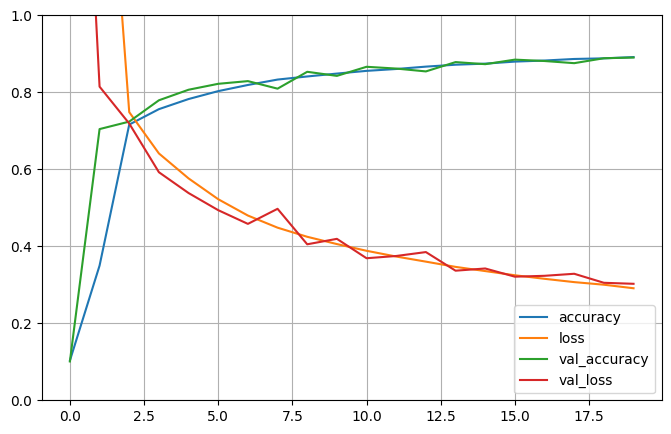

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [9]:
model.evaluate(x_test_scaled, y_test, verbose = 0)

[0.32856428623199463, 0.8812999725341797]